In [64]:
import requests
import pandas as pd
import yaml
import duckdb

In [ ]:
DB_PATH = 'weather.duckdb'
TABLE_NAME = 'observations'


In [154]:
var = 'tempf'
con = duckdb.connect(DB_PATH)
df = con.sql(f"select date AT TIME ZONE 'UTC' AT TIME ZONE 'America/Chicago' AS cst_time, {var} from observations where date >'2025-07-26'").df()
con.close()
df

,cst_time,tempf
0,2025-07-26 16:57:00,94.8
1,2025-07-26 16:58:00,94.6
2,2025-07-26 16:59:00,94.5
3,2025-07-26 17:31:00,92.3
4,2025-07-26 17:43:00,95.9
5,2025-07-26 17:44:00,96.3
6,2025-07-26 17:45:00,96.3
7,2025-07-26 17:46:00,96.3
8,2025-07-26 17:47:00,96.3
9,2025-07-26 17:48:00,96.3


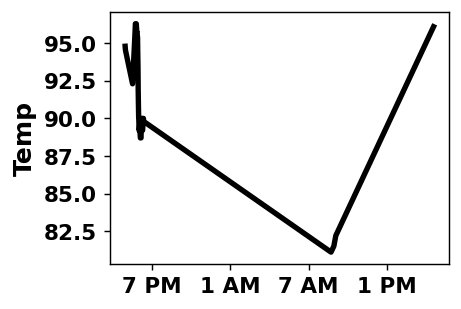

In [155]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



df['mov'] = df[var].rolling(1).mean()
width, height = 400, 400
dpi = 129
figsize = (3.5, 2.5)

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

fig.patch.set_alpha(0.0)       # Transparent figure background
ax.set_facecolor('none')       # Transparent plot background

plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')

ax.set_ylabel('Temp', fontsize=14, fontweight='bold')

ax.plot(df['cst_time'], df['mov'], color='black', linewidth=3)
#ax.plot(df['cst_time'], df[var])

myFmt = mdates.DateFormatter("%#I %p")  # 12-hour format with AM/PM
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax.xaxis.set_major_formatter(myFmt)  # apply formatter to x-axis

plt.tight_layout()
plt.savefig("plots/temperature.png", dpi=129, bbox_inches='tight')
plt.show()


In [56]:
df.groupby

<bound method DataFrame.groupby of                cst_time  dailyrainin
0   2025-07-13 09:42:00        4.067
1   2025-07-13 09:45:00        4.067
2   2025-07-13 09:46:00        4.067
3   2025-07-13 16:00:00        4.378
4   2025-07-13 16:00:00        4.378
..                  ...          ...
198 2025-07-13 20:06:00        4.378
199 2025-07-13 20:07:00        4.378
200 2025-07-13 20:08:00        4.378
201 2025-07-13 16:28:00        4.378
202 2025-07-13 16:28:00        4.378

[203 rows x 2 columns]>

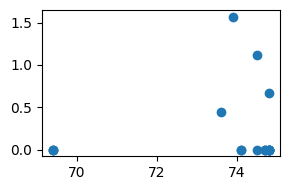

In [13]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from io import BytesIO

def plot_to_bw_pil():
	buf = BytesIO()
	width_px, height_px = 300, 200
	dpi = 100
	fig = plt.figure(figsize=(width_px / dpi, height_px / dpi), dpi=dpi)

	plt.scatter(df['tempf'], df['windspeedmph'])
	plt.tight_layout()
	plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
	buf.seek(0)
	img = Image.open(buf).convert("L")  # grayscale
	bw = img.point(lambda x: 0 if x < 128 else 255, '1')  # threshold to B/W
	return bw

# Create base image
W, H = (800, 480)
image = Image.new("1", (W, H), 255)
draw = ImageDraw.Draw(image)

# Create plot image
plot_img = plot_to_bw_pil()
plot_img = plot_img.resize((300, 200))

# Paste bottom right
image.paste(plot_img, (W - plot_img.width, H - plot_img.height))

image.show()
